   # Import libs

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

# Load dataset - CIFAR10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each: <br>
<img src="cifar10.jpg"/>

In [2]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# Preprocess
Scale X dataset, reshape Y dataset <br>
Watchout for float vs integer division

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Util function
To show the image and the label

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_image(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

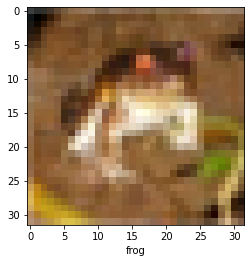

In [11]:
plot_image(X_train, y_train, 0)

# ANN Model - Build, Compile, Fit, Evaluate

In [12]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='SGD', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8155 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 77s 50ms/step - loss: 1.6240 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5435 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4844 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4334 - accuracy: 0.4976


In [35]:
ann_model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.4782 - accuracy: 0.4746


[1.4782301187515259, 0.4745999872684479]

In [36]:
y_pred = ann_model.predict(X_test)
y_pred[:5]

array([[4.61650863e-02, 1.00845516e-01, 6.70524165e-02, 3.65783721e-01,
        2.36736462e-02, 1.40492201e-01, 1.23567395e-01, 3.99639830e-03,
        1.23048611e-01, 5.37502160e-03],
       [5.49193062e-02, 1.59632891e-01, 1.94810459e-03, 1.89445540e-03,
        9.54179908e-04, 4.44586069e-04, 2.13026666e-04, 2.80547509e-04,
        2.81829745e-01, 4.97883141e-01],
       [2.40614370e-01, 1.02199972e-01, 2.54625268e-03, 2.76700524e-03,
        1.53316290e-03, 1.20391976e-03, 1.23036298e-04, 1.33558142e-03,
        5.57163000e-01, 9.05137733e-02],
       [4.28758264e-01, 7.10519776e-02, 2.36807745e-02, 2.66201738e-02,
        2.33829878e-02, 7.10766157e-03, 9.75293689e-04, 1.76029000e-02,
        3.69267344e-01, 3.15526463e-02],
       [1.20113380e-02, 5.67057636e-03, 8.53029713e-02, 8.00304785e-02,
        5.24452865e-01, 4.98566814e-02, 1.89324021e-01, 1.16487322e-02,
        3.99529077e-02, 1.74942194e-03]], dtype=float32)

In [37]:
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:5]

[3, 9, 8, 0, 4]

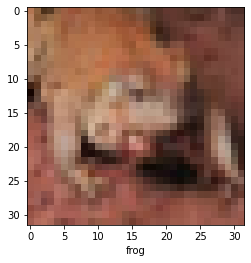

In [38]:
plot_image(X_test, y_pred, 5)

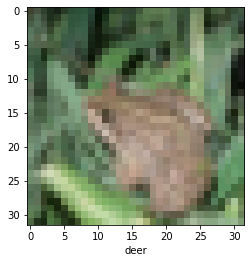

In [17]:
plot_image(X_test, y_pred, 4)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.61      0.51      1000
           1       0.52      0.69      0.59      1000
           2       0.44      0.23      0.30      1000
           3       0.32      0.42      0.37      1000
           4       0.49      0.33      0.39      1000
           5       0.54      0.22      0.31      1000
           6       0.47      0.62      0.53      1000
           7       0.67      0.41      0.51      1000
           8       0.49      0.71      0.58      1000
           9       0.50      0.51      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



# CNN model - Build, Compile, Fit, Evaluate

In [19]:
cnn_model = models.Sequential([
    #cnn with max pooling
    layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    #dense nn
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn_model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])

In [21]:
cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4911 - accuracy: 0.4623
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1557 - accuracy: 0.5923
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0256 - accuracy: 0.6428
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9486 - accuracy: 0.6702
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8864 - accuracy: 0.6923
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8378 - accuracy: 0.7091
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7954 - accuracy: 0.7224
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7555 - accuracy: 0.7374
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7232 - accuracy: 0.7497
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [22]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9603 - accuracy: 0.6789


[0.9602840542793274, 0.6789000034332275]

In [39]:
y_pred = cnn_model.predict(X_test)
y_pred[:5]

array([[1.6975989e-04, 1.2801756e-05, 1.7684798e-03, 8.6992610e-01,
        1.1108097e-04, 9.5447473e-02, 3.2363836e-02, 2.7614769e-05,
        1.5326819e-04, 1.9549372e-05],
       [4.0653264e-04, 3.9071487e-03, 2.1716048e-06, 3.0601267e-08,
        3.8124244e-07, 1.1825408e-09, 1.3503932e-09, 5.6562644e-08,
        9.9566323e-01, 2.0404865e-05],
       [1.8447626e-01, 1.4124316e-01, 7.0775603e-03, 3.5072572e-03,
        3.8907304e-03, 1.4943724e-04, 1.0878392e-03, 1.4938872e-03,
        6.3140386e-01, 2.5670046e-02],
       [8.4481120e-01, 2.5489481e-02, 1.6241595e-02, 4.4527527e-02,
        7.1543045e-03, 1.2354250e-04, 1.6675543e-04, 1.7090930e-04,
        5.9611730e-02, 1.7029472e-03],
       [1.9882332e-07, 9.4490770e-06, 2.0695427e-03, 4.8911963e-03,
        8.9568484e-01, 8.6780009e-04, 9.6365884e-02, 4.4455031e-05,
        6.1634353e-05, 4.9877685e-06]], dtype=float32)

In [40]:
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:5]

[3, 8, 8, 0, 4]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

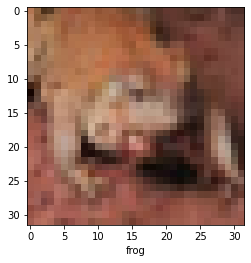

In [42]:
plot_image(X_test, y_pred, 5)

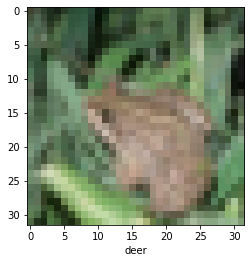

In [43]:
plot_image(X_test, y_pred, 4)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.81      0.79      0.80      1000
           2       0.56      0.55      0.56      1000
           3       0.52      0.45      0.48      1000
           4       0.52      0.76      0.62      1000
           5       0.63      0.52      0.57      1000
           6       0.72      0.81      0.76      1000
           7       0.81      0.63      0.71      1000
           8       0.85      0.74      0.79      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [45]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0